In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Load Dataset

In [2]:
df = pd.read_csv("app/data/Cars.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
# Check the shape
df.shape

(8128, 13)

In [4]:
# Check the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
# Quick analysis of each column
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


## 2. EDA

### Inspect "owner"

In [6]:
# Check all unique values in column "owner"
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [7]:
# Map First owner to 1, ..., Test Drive Car to 5 in owner column
df['owner'].replace({
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5}, inplace=True)

df['owner'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [8]:
# Check selling_price via each category of owner
print('-'*40)
print('Means of selling_price by owner')
print('-'*40)
print(df.groupby(['owner'])['selling_price'].mean().round())
print('-'*40)
print('Median of selling_price by owner')
print('-'*40)
print(df.groupby(['owner'])['selling_price'].median().round())

----------------------------------------
Means of selling_price by owner
----------------------------------------
owner
1     783086.0
2     392964.0
3     284015.0
4     225813.0
5    4403800.0
Name: selling_price, dtype: float64
----------------------------------------
Median of selling_price by owner
----------------------------------------
owner
1     550000.0
2     310000.0
3     225000.0
4     170000.0
5    5923000.0
Name: selling_price, dtype: float64


In [9]:
# Drop "Test Drive Cars" because they are too expensive
df =  df[df['owner'] != 5].reset_index(drop=True)
df['owner'].unique()

array([1, 2, 3, 4], dtype=int64)

Text(0.5, 0, 'owner')

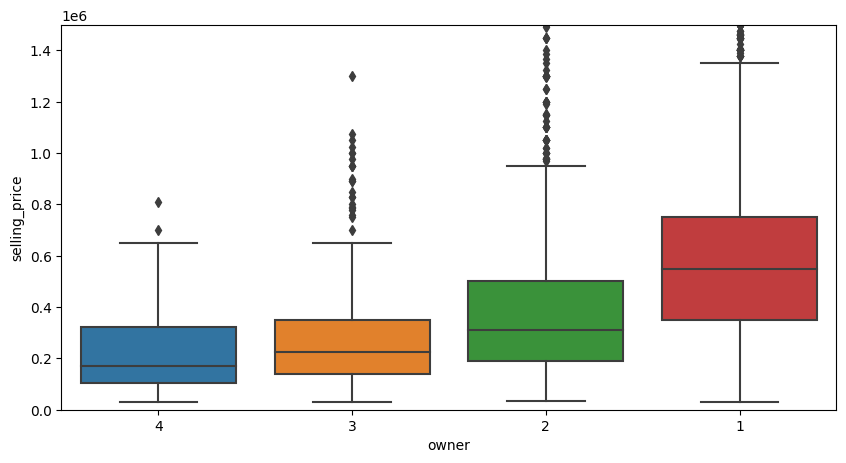

In [10]:
# Box plot of the range of selling prices per each type of owner
plt.figure(figsize=(10, 5))
# Order categories by median values in ascending order
med_idx = df.groupby(['owner'])['selling_price'].median().sort_values().index
sns.boxplot(x = df["owner"], y = df["selling_price"], order=med_idx)

plt.ylim([0, 1500000])
plt.ylabel("selling_price")
plt.xlabel("owner")

Text(0.5, 0, 'owner')

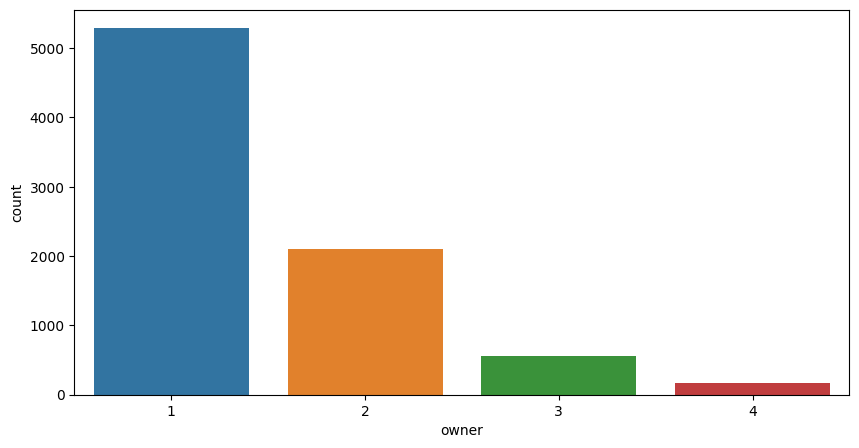

In [11]:
# Count number of each type of owner
plt.figure(figsize=(10, 5))
# Order categories by count
count_idx = df['owner'].value_counts().index
sns.countplot(data=df, x='owner', order=count_idx)

plt.xlabel("owner")

Most of the cars in our dataset are first owner cars.

### Inspect "fuel"

In [12]:
# Check all unique values in column "fuel"
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [13]:
# Remove all rows with CNG and LPG because CNG and LPG in "fuel" column
to_remove = ['LPG', 'CNG']
df =  df[~df['fuel'].isin(to_remove)].reset_index(drop=True)
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

In [14]:
# Check selling_price via each category of fuel
print('-'*40)
print('Means of selling_price by fuel')
print('-'*40)
print(df.groupby(['fuel'])['selling_price'].mean().round())
print('-'*40)
print('Median of selling_price by fuel')
print('-'*40)
print(df.groupby(['fuel'])['selling_price'].median().round())

----------------------------------------
Means of selling_price by fuel
----------------------------------------
fuel
Diesel    791326.0
Petrol    457252.0
Name: selling_price, dtype: float64
----------------------------------------
Median of selling_price by fuel
----------------------------------------
fuel
Diesel    550000.0
Petrol    340000.0
Name: selling_price, dtype: float64


Text(0.5, 0, 'fuel')

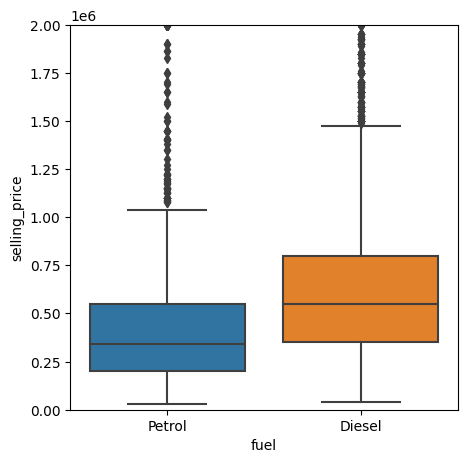

In [15]:
# Box plot of the range of selling prices per each type of fuel
plt.figure(figsize=(5, 5))
# Order categories by median values in ascending order
med_idx = df.groupby(['fuel'])['selling_price'].median().sort_values().index
sns.boxplot(x = df["fuel"], y = df["selling_price"], order=med_idx);

plt.ylim([0, 2000000])
plt.ylabel("selling_price")
plt.xlabel("fuel")

Text(0.5, 0, 'fuel')

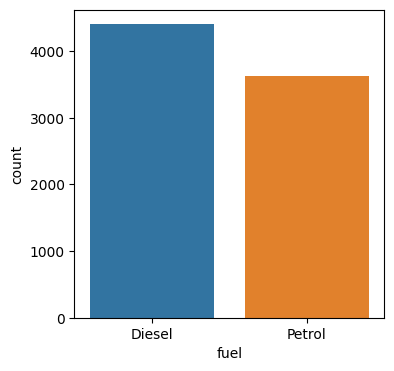

In [16]:
# Count number of each type of fuel
plt.figure(figsize=(4, 4))
# Order categories by count
count_idx = df['fuel'].value_counts().index
sns.countplot(data=df, x='fuel', order=count_idx)

plt.xlabel("fuel")

### Inspect "mileage"

In [17]:
# For mileage, remove "kmpl" and convert the column to float type
df['mileage'] = df['mileage'].str.split().str[0].astype(float)
df['mileage'].head()

0    23.40
1    21.14
2    17.70
3    23.00
4    16.10
Name: mileage, dtype: float64

Mean of mileage: 19.391961863322244
Median of mileage: 19.3


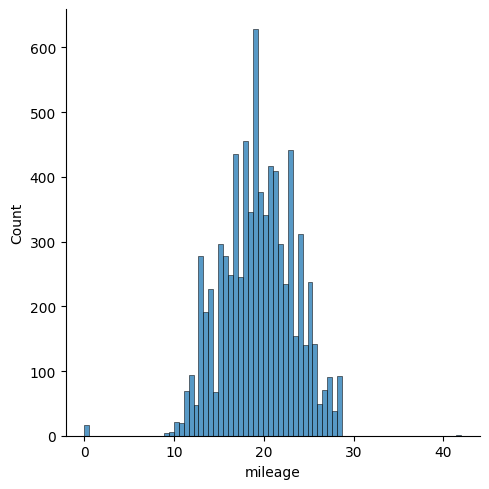

In [18]:
# Distribution plot of mileage
# From the graph, we can see that mileage is normally distributed
sns.displot(data = df, x = 'mileage')

# Mean and Median of mileage
print(f"Mean of mileage: {df['mileage'].mean()}")
print(f"Median of mileage: {df['mileage'].median()}")

### Inspect "km_driven"

Mean of km_driven: 69773.14025909317
Median of km_driven: 60000.0


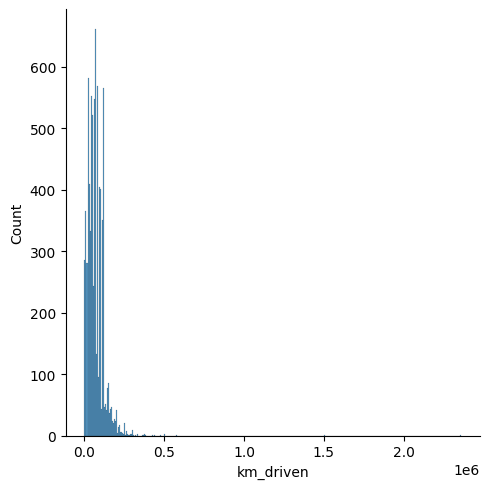

In [19]:
# Distribution plot of km_driven
sns.displot(data = df, x = 'km_driven')

# Mean and Median of mileage
print(f"Mean of km_driven: {df['km_driven'].mean()}")
print(f"Median of km_driven: {df['km_driven'].median()}")

### Inspect "engine"

In [20]:
# For engine, remove "CC" and convert the column to float
df['engine'] = df['engine'].str.split().str[0].astype(float)
df['engine'].head()

0    1248.0
1    1498.0
2    1497.0
3    1396.0
4    1298.0
Name: engine, dtype: float64

Mean of max_power: 1462.9146403890454
Median of max_power: 1248.0


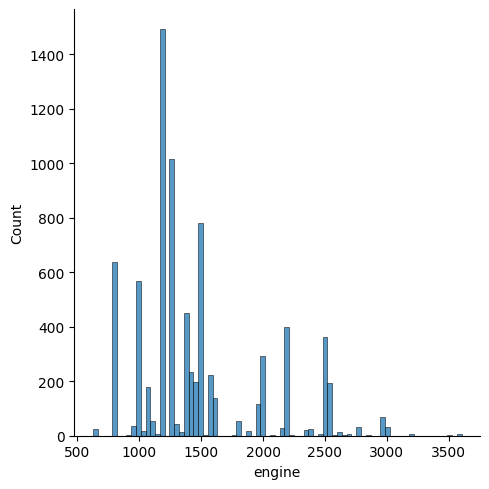

In [21]:
# Distribution plot of engine
sns.displot(data = df, x = 'engine')

# Mean and Median of engine
print(f"Mean of max_power: {df['engine'].mean()}")
print(f"Median of max_power: {df['engine'].median()}")

### Inspect "max_power"

In [22]:
# For max_power, remove "bhp" and convert the column to float
df['max_power'] = df['max_power'].str.split().str[0].astype(float)
df['max_power']

0        74.00
1       103.52
2        78.00
3        90.00
4        88.20
         ...  
8023     82.85
8024    110.00
8025     73.90
8026     70.00
8027     70.00
Name: max_power, Length: 8028, dtype: float64

Mean of max_power: 91.8197257033248
Median of max_power: 82.4


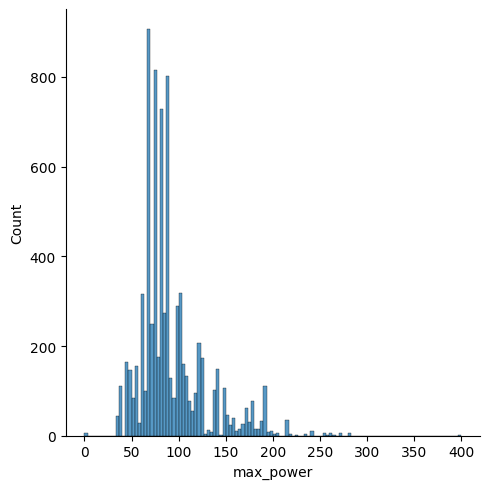

In [23]:
# Distribution plot of max_power
sns.displot(data = df, x = 'max_power')

# Mean and Median of engine
print(f"Mean of max_power: {df['max_power'].mean()}")
print(f"Median of max_power: {df['max_power'].median()}")

### Inspect "seller_type"

In [24]:
# Check selling_price via each category of seller_type
print('-'*40)
print('Means of selling_price by seller_type')
print('-'*40)
print(df.groupby(['seller_type'])['selling_price'].mean().round())
print('-'*40)
print('Median of selling_price by seller_type')
print('-'*40)
print(df.groupby(['seller_type'])['selling_price'].median().round())

----------------------------------------
Means of selling_price by seller_type
----------------------------------------
seller_type
Dealer              1432547.0
Individual           501847.0
Trustmark Dealer     801839.0
Name: selling_price, dtype: float64
----------------------------------------
Median of selling_price by seller_type
----------------------------------------
seller_type
Dealer              690000.0
Individual          400000.0
Trustmark Dealer    650000.0
Name: selling_price, dtype: float64


Text(0.5, 0, 'seller_type')

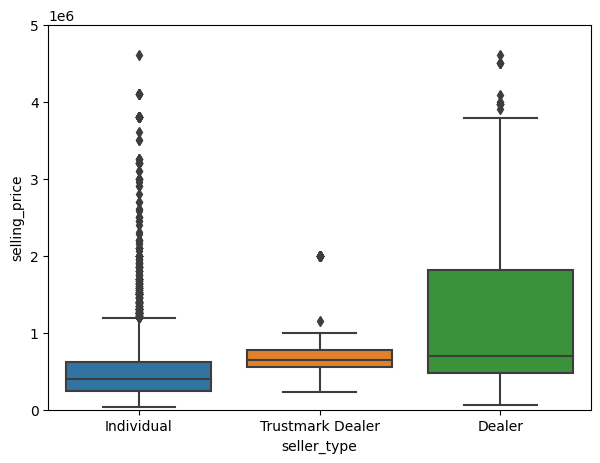

In [25]:
# Box plot of the range of selling prices per each type of fuel
plt.figure(figsize=(7, 5))
# Order categories by median values in ascending order
med_idx = df.groupby(['seller_type'])['selling_price'].median().sort_values().index
sns.boxplot(x = df["seller_type"], y = df["selling_price"], order=med_idx);

plt.ylim([0, 5000000])
plt.ylabel("selling_price")
plt.xlabel("seller_type")

Text(0.5, 0, 'seller_type')

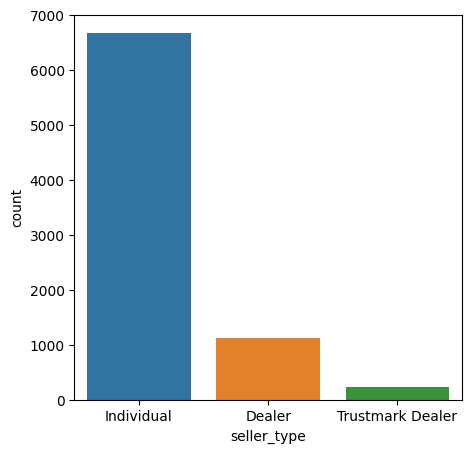

In [26]:
# Count number of each seller type
plt.figure(figsize=(5, 5))
# Order categories by count
count_idx = df['seller_type'].value_counts().index
sns.countplot(data=df, x='seller_type', order=count_idx)

plt.xlabel("seller_type")

Most cars were sold by individual seller.

### Inspect "seats"

In [27]:
# Check selling_price via each category of seats
print('-'*40)
print('Means of selling_price by seats')
print('-'*40)
print(df.groupby(['seats'])['selling_price'].mean().round())
print('-'*40)
print('Median of selling_price by seats')
print('-'*40)
print(df.groupby(['seats'])['selling_price'].median().round())

----------------------------------------
Means of selling_price by seats
----------------------------------------
seats
2.0     700500.0
4.0     491393.0
5.0     631792.0
6.0     581597.0
7.0     813163.0
8.0     585855.0
9.0     500075.0
10.0    344105.0
14.0    235000.0
Name: selling_price, dtype: float64
----------------------------------------
Median of selling_price by seats
----------------------------------------
seats
2.0     700500.0
4.0      65000.0
5.0     425000.0
6.0     500000.0
7.0     690000.0
8.0     500000.0
9.0     500000.0
10.0    295000.0
14.0    235000.0
Name: selling_price, dtype: float64


Text(0.5, 0, 'seats')

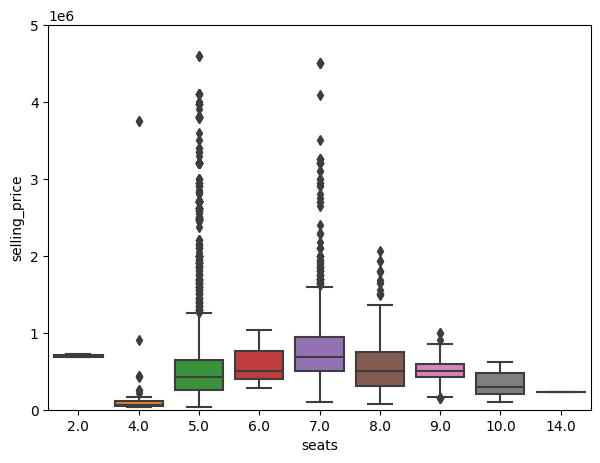

In [28]:
# Box plot of the range of selling prices per each type of seats
plt.figure(figsize=(7, 5))
sns.boxplot(x = df["seats"], y = df["selling_price"]);

plt.ylim([0, 5000000])
plt.ylabel("selling_price")
plt.xlabel("seats")

Text(0.5, 0, 'seats')

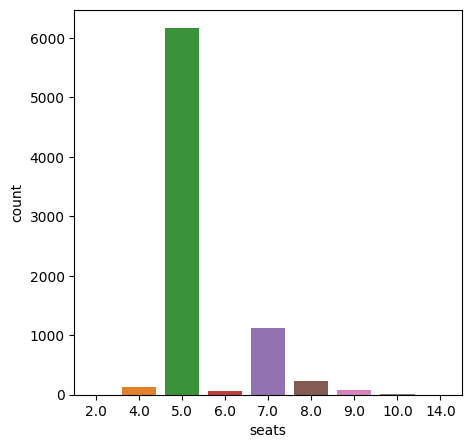

In [29]:
# Count number of each seats
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='seats')

plt.xlabel("seats")

### Inspect "name"

In [30]:
# For the feature brand, take only the first word and remove the rest
df['name'] = df['name'].str.split().str[0]
df.rename(columns={'name': 'brand'}, inplace=True)
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [31]:
# Check the mean selling price by car brand
print('-'*40)
print('Means of selling_price by brand')
print('-'*40)
print(df.groupby(['brand'])['selling_price'].mean().round())

----------------------------------------
Means of selling_price by brand
----------------------------------------
brand
Ambassador        124000.0
Ashok             300000.0
Audi             2319432.0
BMW              4109917.0
Chevrolet         274515.0
Daewoo             77000.0
Datsun            314600.0
Fiat              296064.0
Force             887500.0
Ford              516683.0
Honda             593166.0
Hyundai           462422.0
Isuzu            1942000.0
Jaguar           2915465.0
Jeep             2149613.0
Kia              1504500.0
Land             3608333.0
Lexus            5150000.0
MG               1783333.0
Mahindra          623224.0
Maruti            406733.0
Mercedes-Benz    2470444.0
Mitsubishi        817500.0
Nissan            465407.0
Opel               68000.0
Peugeot            57000.0
Renault           462618.0
Skoda             607724.0
Tata              357709.0
Toyota            959947.0
Volkswagen        494216.0
Volvo            3272015.0
Name: selling_pr

In [32]:
# Check the median selling price by car brand
print('-'*40)
print('Median of selling_price by brand')
print('-'*40)
print(df.groupby(['brand'])['selling_price'].median().round())

----------------------------------------
Median of selling_price by brand
----------------------------------------
brand
Ambassador        110500.0
Ashok             300000.0
Audi             2200000.0
BMW              5400000.0
Chevrolet         223000.0
Daewoo             86000.0
Datsun            300000.0
Fiat              280000.0
Force             910000.0
Ford              480000.0
Honda             567500.0
Hyundai           445000.0
Isuzu            1900000.0
Jaguar           3000000.0
Jeep             1675000.0
Kia              1737500.0
Land             4500000.0
Lexus            5150000.0
MG               1750000.0
Mahindra          560000.0
Maruti            370000.0
Mercedes-Benz    2075500.0
Mitsubishi        787500.0
Nissan            375000.0
Opel               68000.0
Peugeot            57000.0
Renault           397000.0
Skoda             645000.0
Tata              280000.0
Toyota            750000.0
Volkswagen        425000.0
Volvo            3400000.0
Name: selling_p

Text(0.5, 0, 'brand')

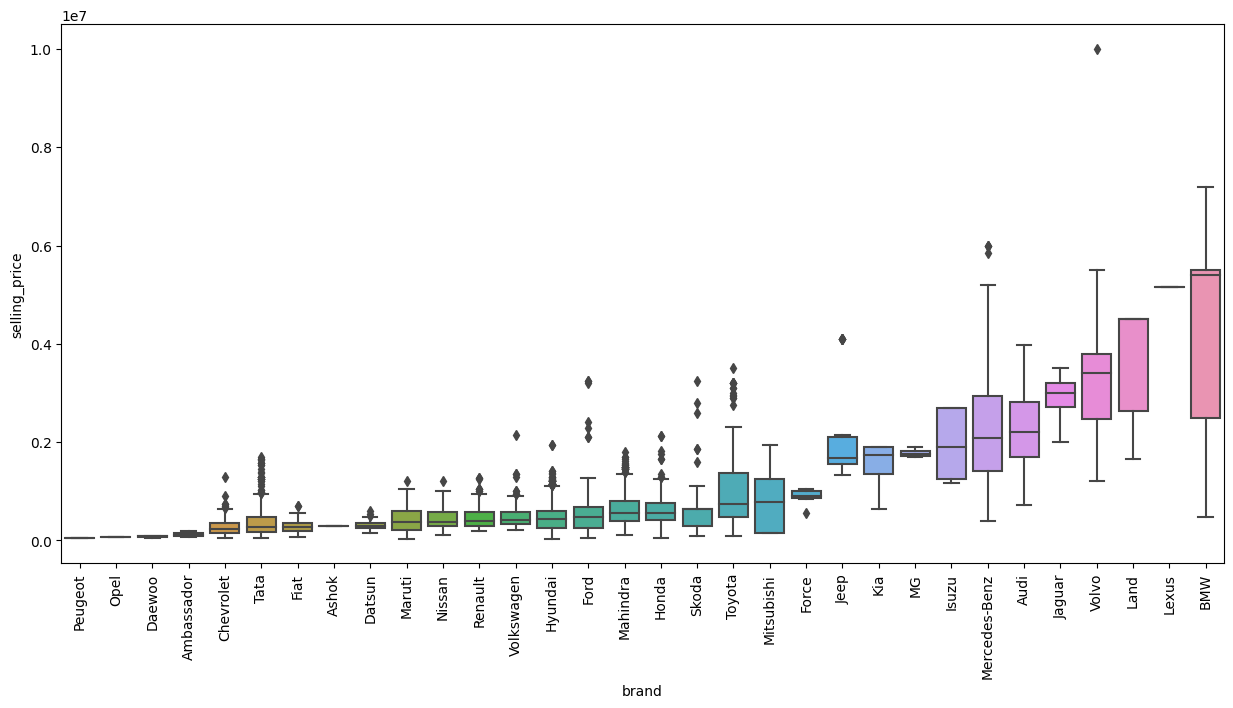

In [33]:
plt.figure(figsize=(15, 7))
# Order the box plot by median values in ascending order
med_idx = df.groupby(['brand'])['selling_price'].median().sort_values().index
sns.boxplot(x = df["brand"], y = df["selling_price"], order=med_idx);

plt.xticks(rotation='vertical')
plt.ylabel("selling_price")
plt.xlabel("brand")

We can see from the boxplot that each car brand has vastly different price range, therefore car brand can be selected as a predictor of selling price

Text(0.5, 0, 'brand')

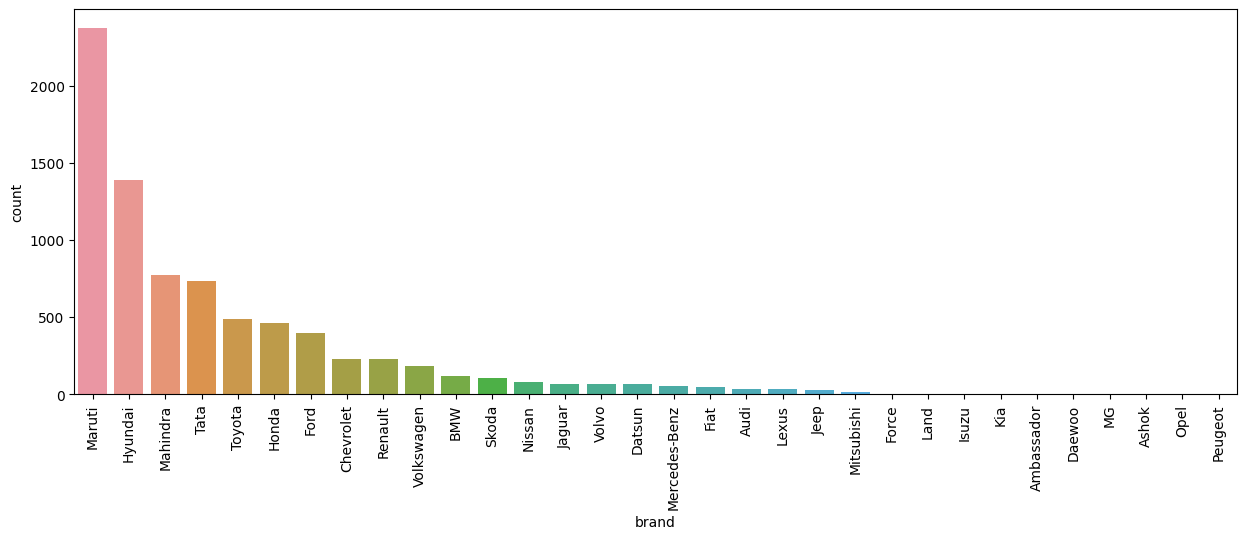

In [34]:
# Count number of each car brand
plt.figure(figsize=(15, 5))
# Order categories by count
count_idx = df['brand'].value_counts().index
sns.countplot(data=df, x='brand', order=count_idx)

plt.xticks(rotation='vertical')
plt.xlabel("brand")

From the above count plot, Maruti brand appears the most in our dataset (mode)

### Inspect "transmission"

In [35]:
# Check selling_price via each category of seller_type
print('-'*40)
print('Means of selling_price by transmission')
print('-'*40)
print(df.groupby(['transmission'])['selling_price'].mean().round())
print('-'*40)
print('Median of selling_price by transmission')
print('-'*40)
print(df.groupby(['transmission'])['selling_price'].median().round())

----------------------------------------
Means of selling_price by transmission
----------------------------------------
transmission
Automatic    1858222.0
Manual        457946.0
Name: selling_price, dtype: float64
----------------------------------------
Median of selling_price by transmission
----------------------------------------
transmission
Automatic    1082500.0
Manual        400000.0
Name: selling_price, dtype: float64


Text(0.5, 0, 'transmission')

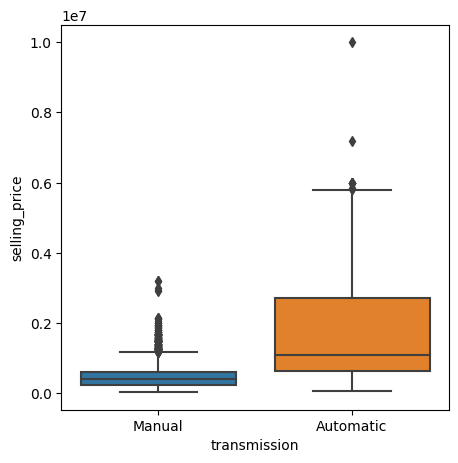

In [36]:
# Box plot of the range of selling prices per each type of transmission
plt.figure(figsize=(5, 5))
# Order the box plot by median values in ascending order
med_idx = df.groupby(['transmission'])['selling_price'].median().sort_values().index
sns.boxplot(x = df["transmission"], y = df["selling_price"], order=med_idx);

# plt.ylim([0, 5000000])
plt.ylabel("selling_price")
plt.xlabel("transmission")

Text(0.5, 0, 'transmission')

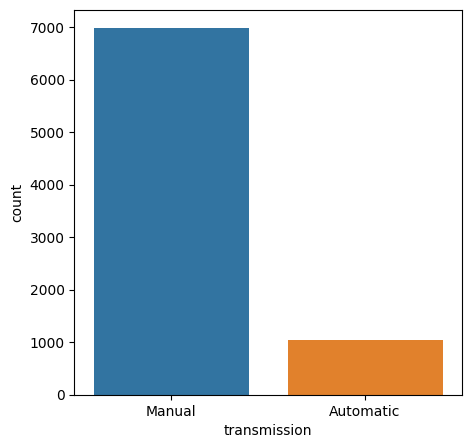

In [37]:
# Count number of each transmission type
plt.figure(figsize=(5, 5))
# Order categories by count
count_idx = df['transmission'].value_counts().index
sns.countplot(data=df, x='transmission', order=count_idx)

plt.xlabel("transmission")

### Inspect "year"

Mean of year: 2013.8155206776282
Median of year: 2015.0
Minimum of year: 1983
Maximum of year: 2020


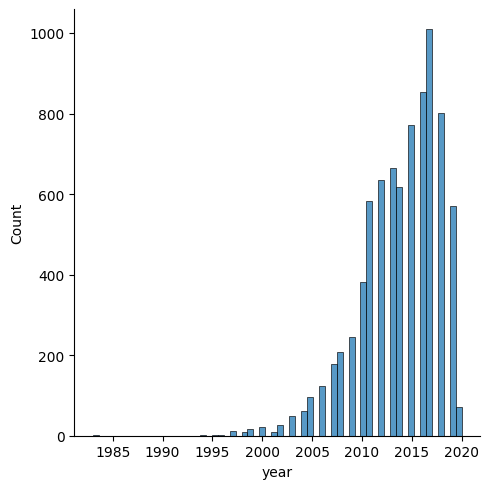

In [38]:
# Distribution plot of max_power
sns.displot(data=df, x='year')

# Mean and Median of year
print(f"Mean of year: {df['year'].mean()}")
print(f"Median of year: {df['year'].median()}")

# Minimum and Maximum of year
print(f"Minimum of year: {df['year'].min()}")
print(f"Maximum of year: {df['year'].max()}")

### Inpect "torque"

In [39]:
# Chaky’s company does not understand well about the feature 'torque'
# Therefore we will drop it
df.drop(columns='torque', inplace=True)
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


### Label and One-Hot Encoding

In [40]:
# Check all unique values of 'brand'
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

In [41]:
# Check all unique values of 'transmission'
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [42]:
# Check all unique values of 'seller_type'
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [43]:
# Check all unique values of 'brand'
df['brand'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [44]:
# Since 'fuel' and 'transmission' have only two unique values, we can do label encoding
from sklearn.preprocessing import LabelEncoder

# Label encoding on 'fuel'
fuel_le = LabelEncoder()
df['fuel'] = fuel_le.fit_transform(df['fuel'])

# Label encoding on 'transmission'
trans_le = LabelEncoder()
df['transmission'] = trans_le.fit_transform(df['transmission'])

In [45]:
from sklearn.preprocessing import OneHotEncoder

# Create function for one-hot encoding a feature in dataframe 
def one_hot_transform(encoder, dataframe, feature):

    encoded = encoder.transform(dataframe[[feature]])

    # Transform encoded data arrays into dataframe where columns are based values
    categories = encoder.categories_[0]
    feature_df = pd.DataFrame(encoded.toarray(), columns=categories[1:])
    concat_dataframe = pd.concat([dataframe, feature_df], axis=1)
    
    return concat_dataframe.drop(feature, axis=1)

In [46]:
# Since 'brand' and 'seller_type' have than two unique values, we should apply one-hot encoding
brand_ohe = OneHotEncoder(drop='first').fit(df[['brand']])
df = one_hot_transform(brand_ohe, df, 'brand')

seller_type_ohe = OneHotEncoder(drop='first').fit(df[['seller_type']])
df = one_hot_transform(seller_type_ohe, df, 'seller_type')

In [47]:
# Excluding one-hot encoded features
selected_cols = ['year', 'selling_price', 'km_driven', 'fuel', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']
dfcopy = df.copy()
dfcopy = df[selected_cols]

### Correlation and Predictive Power Matrices

- We can use correlation matrix to find out which features are highly correlated with selling price (relavant features)
- It also tells us which features are correlated with each other (redundant features)

<Axes: >

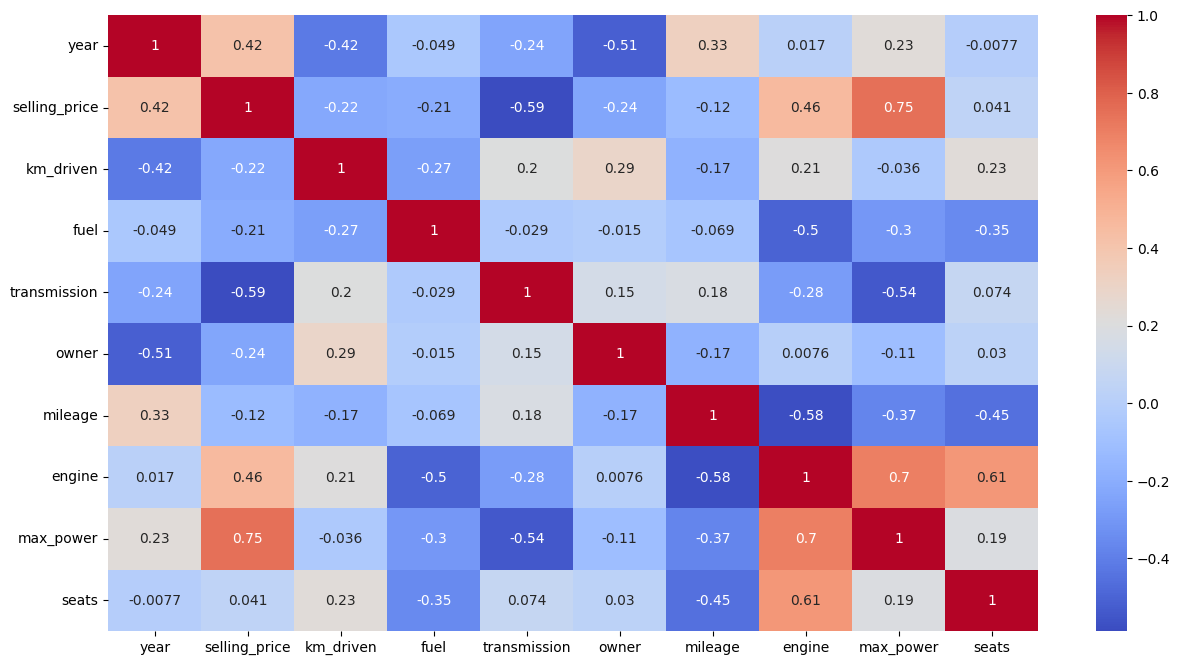

In [48]:
plt.figure(figsize = (15,8))
sns.heatmap(dfcopy.corr(numeric_only=True), annot=True, cmap="coolwarm")

Predictive power tells us how much influence does each feature has to the value of selling price

<Axes: xlabel='x', ylabel='y'>

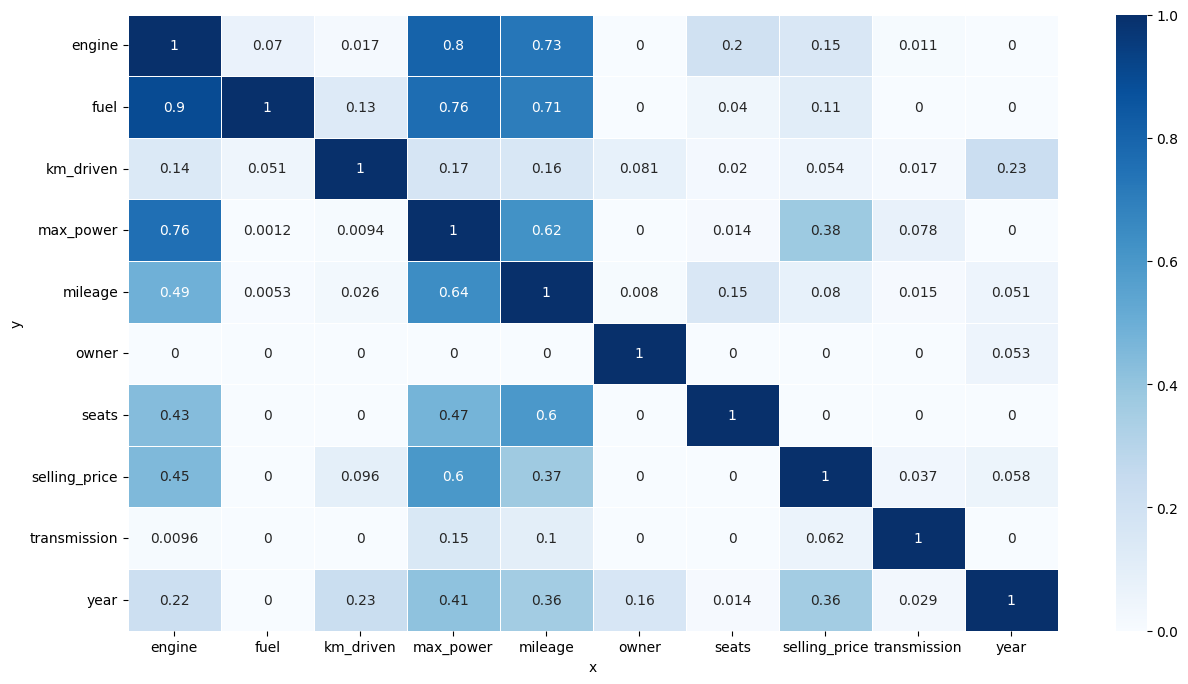

In [49]:
import ppscore as pps

matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

## 3. Data Preprocessing

- From the ppscore matrix, we will select only features with predictive power score > 0.1 in order to predict "selling_price"
- However, we will not select "engine" because it has high correlation with "max_power" and has much lower predictive power.
- In addition, we'll also select columns corresponding to "brand" as features due to the reason mentioned in EDA part

In [50]:
brand_cats = list(brand_ohe.categories_[0][1:])
selected_cols = ['max_power', 'year', 'fuel'] + brand_cats
X = df[selected_cols]
y = np.log(df['selling_price'])

### Train test split

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Find number of null values for each feature

In [52]:
null_train = X_train.isna().sum()
null_train[null_train > 0]

max_power    165
dtype: int64

In [53]:
null_test = X_test.isna().sum()
null_test[null_test > 0]

max_power    43
dtype: int64

In [54]:
y_train.isna().sum()

0

In [55]:
y_test.isna().sum()

0

### Imputation for max_power

Filling in missing values for max_power using either mean or median

Mean of max_power: 91.8197257033248
Median of max_power: 82.4


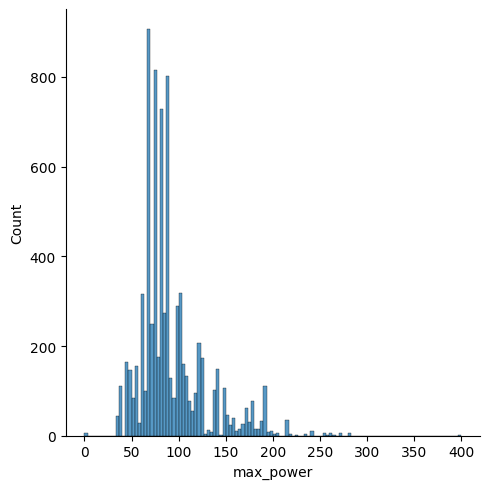

In [56]:
# Let's inspect the distribution plot, mean and median of max_power again
sns.displot(data=df, x='max_power')

print(f"Mean of max_power: {df['max_power'].mean()}")
print(f"Median of max_power: {df['max_power'].median()}")

max_power is skewed so median would be a better choice compared to mean

In [57]:
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)

### Checking outliers

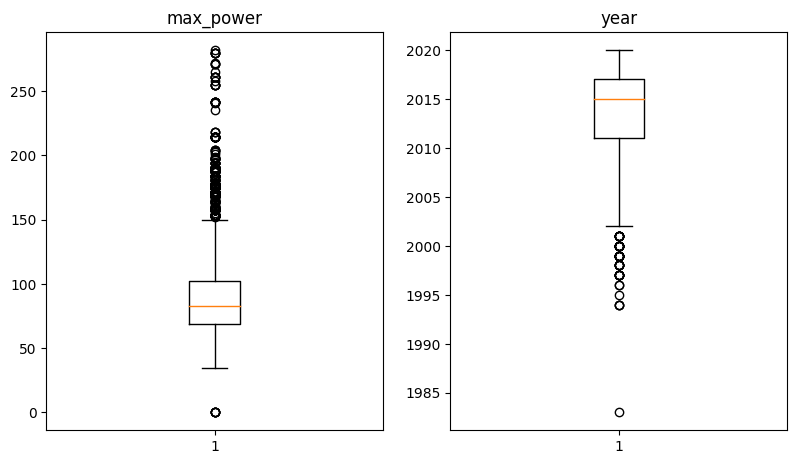

In [58]:
# Create a dictionary of columns.
col_dict = {'max_power': 1,'year': 2}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [59]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [60]:
for col in X_train[['max_power', 'year']]:
    outlier_count(col)


---------------max_power---------------

Number of outliers: 459
Percent of data that is outlier: 7.15%

---------------year---------------

Number of outliers: 63
Percent of data that is outlier: 0.98%


### Scaling

As seen in the distribution plots above, all of our numerical features are skewed. Therefore, it is better to do normalization.

In [61]:
from sklearn.preprocessing import MinMaxScaler

# select only features with numerical values not categorical
num_cols = ['max_power', 'year']
scaler = MinMaxScaler(feature_range = (0, 1))
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])

In [62]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6422, 34)
Shape of X_test:  (1606, 34)
Shape of y_train:  (6422,)
Shape of y_test:  (1606,)


## 4. Modeling

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Libraries for model evaluation

# Models that we will be using, put them in a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 42), 
              RandomForestRegressor(n_estimators = 100, random_state = 42)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

In [64]:
from sklearn.model_selection import KFold, cross_val_score

# We will evaluate each model with 10-fold cross validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

print("Negative MSE:")
for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Negative MSE:


Linear Regression - Score: [-0.07227982 -0.07394935 -0.07133368 -0.06742736 -0.07035701 -0.07447382
 -0.06781317 -0.06912245 -0.07368488 -0.07665375]; Mean: -0.0717095287886022
SVR - Score: [-0.06067172 -0.06404988 -0.05853694 -0.05490655 -0.06094061 -0.06549843
 -0.05608432 -0.05687824 -0.06204415 -0.06141215]; Mean: -0.06010229918152522
KNeighbors Regressor - Score: [-0.06169671 -0.0617132  -0.0650807  -0.05103199 -0.05361614 -0.06029619
 -0.05543798 -0.05796177 -0.04887741 -0.05919692]; Mean: -0.05749090073483013
Decision-Tree Regressor - Score: [-0.06102502 -0.07089975 -0.06000507 -0.04856875 -0.05704608 -0.05660403
 -0.06207161 -0.05304102 -0.0534417  -0.05757806]; Mean: -0.058028109708591326
Random-Forest Regressor - Score: [-0.05165252 -0.05953726 -0.05342725 -0.04373517 -0.0496137  -0.05190015
 -0.0515034  -0.04919406 -0.04556958 -0.04711233]; Mean: -0.05032454180889827


In [65]:
print("R2:")
for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

R2:
Linear Regression - Score: [0.89148829 0.89949014 0.90039406 0.90212936 0.9021499  0.89068654
 0.91032899 0.88552259 0.90734757 0.87702564]; Mean: 0.8966563078455853
SVR - Score: [0.90891521 0.91294523 0.91826263 0.92030328 0.91524591 0.9038607
 0.92583833 0.90580089 0.92198479 0.90147748]; Mean: 0.9134634462722955
KNeighbors Regressor - Score: [0.90737643 0.91612118 0.90912534 0.92592719 0.92543252 0.91149661
 0.92669302 0.9040064  0.93854083 0.90503134]; Mean: 0.9169750850568518
Decision-Tree Regressor - Score: [0.90838481 0.90363507 0.91621264 0.92950258 0.92066228 0.91691601
 0.9179212  0.91215591 0.93280163 0.90762846]; Mean: 0.9165820575696417
Random-Forest Regressor - Score: [0.92245549 0.91907865 0.92539749 0.9365185  0.93099897 0.92382041
 0.9318958  0.91852708 0.94270015 0.92441846]; Mean: 0.9275811009045946


We will select Random-Forest Regressor because it has the highest negative MSE and R2 scores compared to other models.

In [66]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 42)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit your grid_search
grid.fit(X_train, y_train);  #fit means start looping all the possible parameters

In [67]:
# The best parameters of Random-Forest Regressor from grid searching
grid.best_params_

{'bootstrap': True, 'max_depth': None, 'n_estimators': 13}

In [68]:
# Find your grid_search's best score
best_mse = grid.best_score_
best_mse

-0.05061680782562176

## 5. Testing

In [69]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = grid.predict(X_test)

print("MSE: ", mean_squared_error(y_test, y_pred))
print("r2: ", r2_score(y_test, y_pred))

MSE:  0.04713219748772772
r2:  0.9338162360961892


In [70]:
# Compared actual and predicted selling prices of our testing set
pd.DataFrame({'actual_price': np.exp(y_test), 'predicted_price': np.exp(y_pred)})

,actual_price,predicted_price
5867,225000.0,229381.095695
5957,900000.0,950670.725702
3032,320000.0,348687.266225
6445,650000.0,495987.964331
318,520000.0,593987.049550
...,...,...
4608,440000.0,460969.463849
2943,700000.0,910213.681425
2441,60000.0,44259.747311
921,750000.0,600891.067147


## 6. Feature Importance Analysis

In [71]:
# stored in this variable
# note that grid here is random forest
rf = grid.best_estimator_

rf.feature_importances_

array([4.54086701e-01, 4.77471127e-01, 1.12379500e-02, 4.49962719e-06,
       1.66126116e-04, 1.42215236e-03, 4.48276704e-03, 2.91094681e-05,
       4.03773670e-04, 6.74986377e-04, 9.27656947e-05, 2.42248596e-03,
       1.74933320e-03, 2.20482521e-03, 5.28552648e-06, 1.60174525e-03,
       3.64589986e-05, 9.64214096e-05, 3.23621582e-04, 1.05876391e-08,
       8.78756873e-06, 1.00657275e-02, 2.40617286e-03, 1.26639736e-03,
       1.55274056e-04, 3.75804766e-04, 0.00000000e+00, 0.00000000e+00,
       6.67111049e-04, 5.91642334e-04, 1.45872831e-02, 9.30357638e-03,
       1.50596254e-03, 5.54114334e-04])

Text(0.5, 0, 'Random Forest Feature Importance')

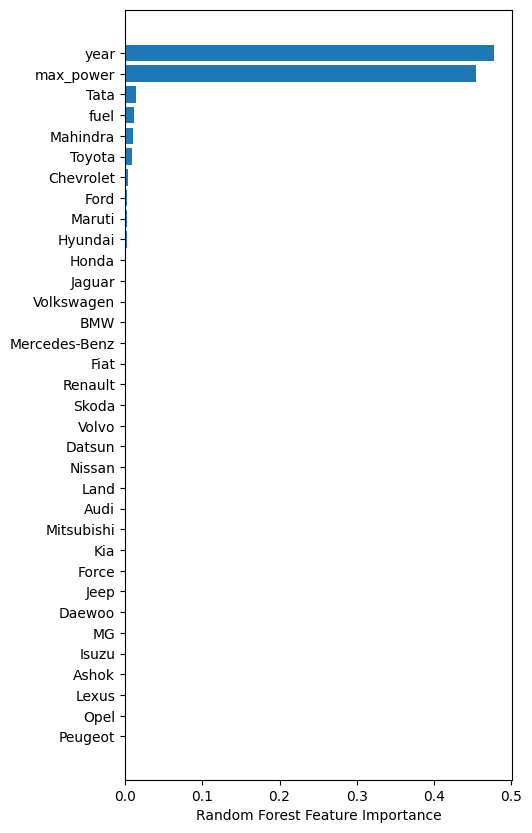

In [72]:
# sort the features by importance scores
sorted_idx = rf.feature_importances_.argsort()

plt.figure(figsize=(5, 10))
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## 7. Inference

In [73]:
import pickle

# save the model to disk
model_path = 'app/model/car_price_prediction.model'
pickle.dump(grid, open(model_path, 'wb'))

# save the scaler to disk
scaler_path = 'app/preprocess/scaler.prep'
pickle.dump(scaler, open(scaler_path, 'wb'))

# save the label encoder for 'fuel' to disk
fuel_enc_path = 'app/preprocess/fuel_encoder.prep'
pickle.dump(fuel_le, open(fuel_enc_path, 'wb'))

# save the one hot encoder for 'brand' to disk
brand_enc_path = 'app/preprocess/brand_encoder.prep'
pickle.dump(brand_ohe, open(brand_enc_path, 'wb'))

In [74]:
# paths of all components for car price predictions
model_path = 'app/model/car_price_prediction.model'
scaler_path = 'app/preprocess/scaler.prep'
fuel_enc_path = 'app/preprocess/fuel_encoder.prep'
brand_enc_path = 'app/preprocess/brand_encoder.prep'

# load all components
model = pickle.load(open(model_path, 'rb'))
scaler = pickle.load(open(scaler_path, 'rb'))
fuel_le = pickle.load(open(fuel_enc_path, 'rb'))
brand_ohe = pickle.load(open(brand_enc_path, 'rb'))

In [75]:
# The types of fuel we have in our fuel encoder
fuel_le.classes_

array(['Diesel', 'Petrol'], dtype=object)

In [76]:
# The names of brands we have in our brand encoder
brand_ohe.categories_[0]

array(['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
       'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
       'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
       'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel',
       'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [77]:
# Define our own sample of car
sample_df = pd.DataFrame([[107, 2017, 'Petrol', 'BMW']],
                         columns=['max_power', 'year', 'fuel', 'brand'])
sample_df

,max_power,year,fuel,brand
0,107,2017,Petrol,BMW


In [78]:
# Encode and scale each feature
sample_df[num_cols] = scaler.transform(sample_df[num_cols])
sample_df['fuel'] = fuel_le.transform(sample_df[['fuel']])
sample_df = one_hot_transform(brand_ohe, sample_df, 'brand')
sample_df

,max_power,year,fuel,Ashok,Audi,BMW,Chevrolet,Daewoo,Datsun,Fiat,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,0.379433,0.918919,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
# predicted selling price based on our sample of car
print(f"Predicted selling price: {np.exp(model.predict(sample_df))[0]}")

Predicted selling price: 734152.845609578


### Car Price Prediction Report

#### Feature Importance

What we've learned from the cars dataset and the predictive power score matrix is that the most influential features that control the change in car selling price are firstly, the car max power and secondary, the year that the car was manufactured, and on the contrary, features such as Km driven, transmission, seats and owners are not very useful in predicting the car selling price.

For car max power and year, both features also have positive correlations with the selling price, meaning that when the value of max power or year increase, the value of selling price would also increase. Based on my understanding about car, my assumptions on why theses two features turn out to be the most important are;

- It is apparent that the car max power would have a high predictive power for selling price since some cars, especially those used in the motorsport industry are defined by their speed and the speed of a car is closely linked to its horsepower. Manufacturers then set the price tags of such cars according to their maximum horsepower. Hence, the strong relationship between max power and selling price.
- There are number of possible reasons why year has a high predictive power for selling price; Assuming that the selling prices are the prices of cars at the time they were first launched, then it is reasonable that the cars manufactured 20-30 years ago would have much lower price tags compared to modern cars due to inflation rates. However, if the selling prices are the current car prices, then we can hypothesize that older models are usually less valuable compared to modern models.


#### Comparing Machine Learning Algorithms

The results from our 10-fold cross validations shown that the best performing algorithm with the least MSE and the highest $R^2$ is Random Forest Regressor. Possibly, this is because Random Forest, is an ensemble method which firstly creates multiple independent decision trees then aggregates the outputs of each tree in order to determine the final outputs. This also means that Random Forest can also handle non-linear relationships very well. When comparing this algorithm with others such as Linear Regression that only relies on single model at a time and captures only linear relationships, we can see why Random Forest Regressor performs best.